# Image Saving, Calibration, and Data Extraction

Take an image with your ESP32. Then we can find a scale factor and extract important data.

In [195]:
#load in packages
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from scipy.optimize import least_squares

# Part 1: Scale Factor

In [196]:
# Type your text file here for the scale factor
with open('scale.txt', 'r') as file:
    hex_data = file.read()

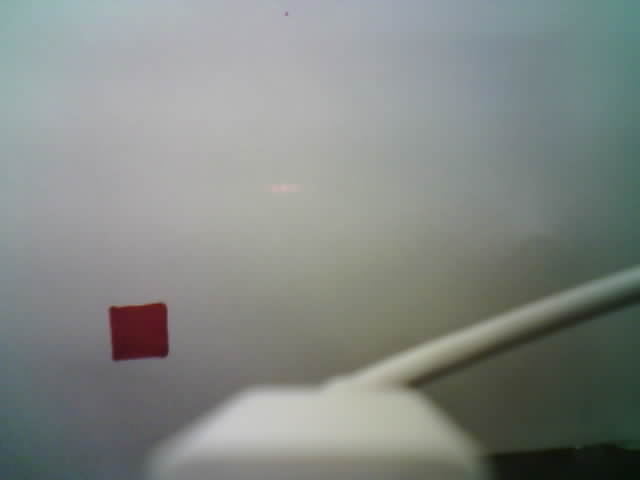

In [197]:
# Clean up the hex data, removing any spaces or new lines
cleaned_hex_data = hex_data.replace("\n", "").replace(" ", "")

# Convert the hex string into binary data
scale_data = bytes.fromhex(cleaned_hex_data)

# Save the binary data as a JPEG image
with open("Lab4BScale.jpg", "wb") as image_file:
    image_file.write(scale_data)

# Display the image in the notebook (optional)
from IPython.display import Image, display
display(Image(filename="Lab4BScale.jpg"))

In [198]:
# Load the image
scale_image = PILImage.open('Lab4BScale.jpg')

# Convert the image to a NumPy array
scale_array = np.array(scale_image)

Now we want to find the scale factor to calibrate our image. We do this by marking a 1cm x 1cm square on our piece of paper. Since we know the dimensions of this square in cm we want to find the dimensions in pixel count. We can then find "n" which is our number of pixels per centimeter calibration.

If this square does not fit perfectly, that is ok, but try as best as you can.

Each centimeter of space takes up 54 pixels on the camera


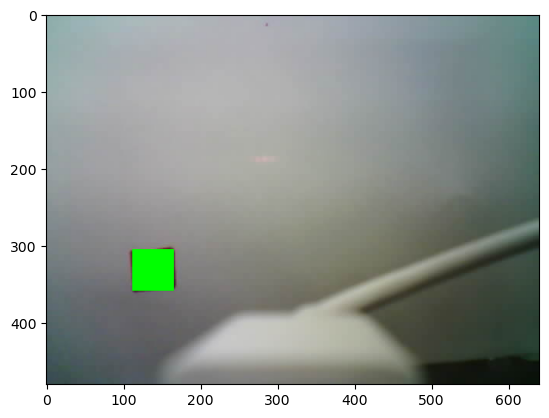

In [199]:
scale_array_calibration = np.array(scale_image)

# Parameters for the square (Edit these to make your square fit)
# Size of the square (n x n) 
n = 
# Top-left corner of the square (x, y)
x, y = 

# Add the square to the image
color = [0, 255, 0]  # Color of the square (e.g., red in RGB)
# Ensure the square doesn't go out of bounds
scale_image_height, scale_image_width = scale_array.shape[:2]
x_end = min(x + n, scale_image_width)
y_end = min(y + n, scale_image_height)

scale_array_calibration[y:y_end, x:x_end] = color  # Set the square's color

plt.imshow(scale_array_calibration)
print('Each centimeter of space takes up', n, 'pixels on the camera')

# Part 2: 1 Dimensional Lineout

We would now like to load in a new image with the lights turned off to make our laser brighter. Since the diffraction pattern occurs in 1 dimension we only need to analyze data along 1 dimension. We will then find the y position where the data occurs and extract it

In [175]:
# Type your text file here for the scale factor
with open('DoubleSlit.txt', 'r') as file:
    hex_data = file.read()

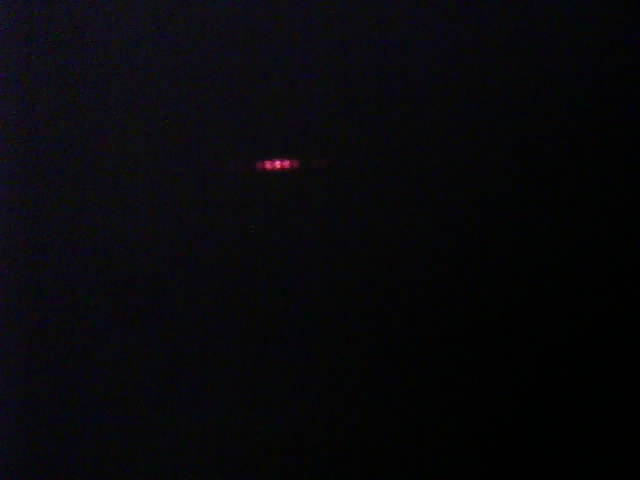

In [176]:
# Clean up the hex data, removing any spaces or new lines
cleaned_hex_data = hex_data.replace("\n", "").replace(" ", "")

# Convert the hex string into binary data
image_data = bytes.fromhex(cleaned_hex_data)

# Save the binary data as a JPEG image
with open("Lab4BData.jpg", "wb") as image_file:
    image_file.write(image_data)

# Display the image in the notebook (optional)
from IPython.display import Image, display
display(Image(filename="Lab4BData.jpg"))

In [177]:
# Load the image
image = PILImage.open('Lab4BData.jpg')

# Convert the image to a NumPy array
image_array = np.array(image)

Now we must find the y position to take a 1 dimensional lineout through so we can identify the x position of each peak.

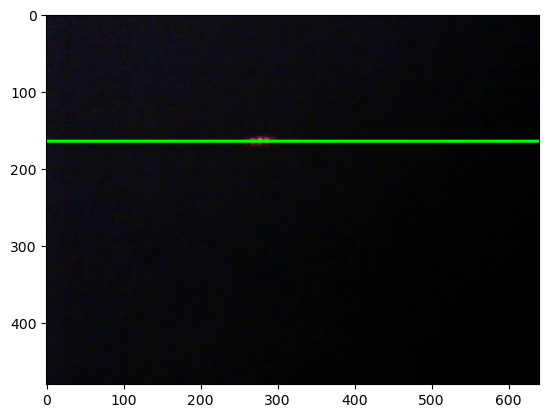

In [178]:
image_array_line_position = np.array(image)
#edit this value until the line goes through your data
y = 

image_array_line_position[y-2:y+2,:] = color
plt.imshow(image_array_line_position)

Once the y value, we want to select all the color values along this line. We will average the data values slightly above and below this line to account for the thickness of the patterns and enusre we can pick up the difraction pattern.

In [179]:
# Average our rows
rows_to_average = [y - 2, y - 1, y + 1, y + 2]

# Ensure rows are within bounds of the image
valid_rows = [row for row in rows_to_average if 0 <= row < image_array.shape[0]]

# Calculate the average
if len(image_array.shape) == 2:  # Grayscale image
    avg_values = np.mean(image_array[valid_rows, :], axis=0)
elif len(image_array.shape) == 3:  # Color image (RGB or RGBA)
    avg_values = np.mean(image_array[valid_rows, :, :], axis=0)

You will now notice that this data array has 3 columns of data. This is because the camera sorts light into three colors: Red, Green, and Blue on a scale form 0 to 255 (8 bit). Obviously, the red value is the highest of these 3 because we are looking at a red laser. The brightness of each pixel is determined by the average of the 3 color values, with (0,0,0) corresponding to pitch black, and (255, 255, 255) corresponds to bright white.

In [180]:
# Red_values = avg_values[:,0]
# Green_values = avg_values[:,1] 
# Blue_values = avg_values[:,2] 

Brightness = np.mean(avg_values, axis=1)

We wish to make the x axis represent distance in meters

Text(0, 0.5, 'Intensity')

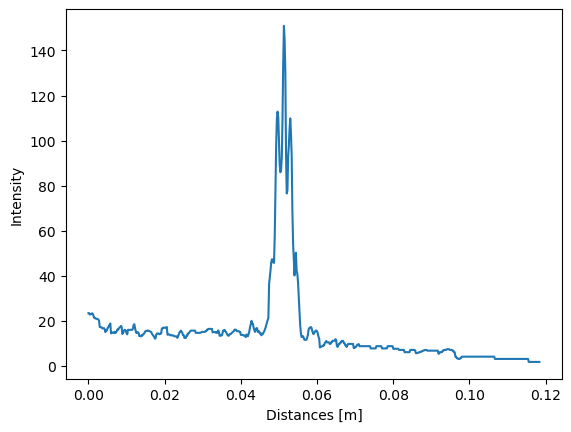

In [181]:
# Create an X distance Array
# hint: use np.linspace with the size determined by the length of the brightness array
Distances = 

# Convert pixels into centimeters (remember our scale factor from earlier)
Distances = 
# Convert centimeters into meters
Distances = 

# Now plot Distance vs Brightness
plt.plot(Distances, Brightness)
plt.xlabel('Distances [m]')
plt.ylabel('Intensity')

Now we want to noramlize the intensity and center the maximum value

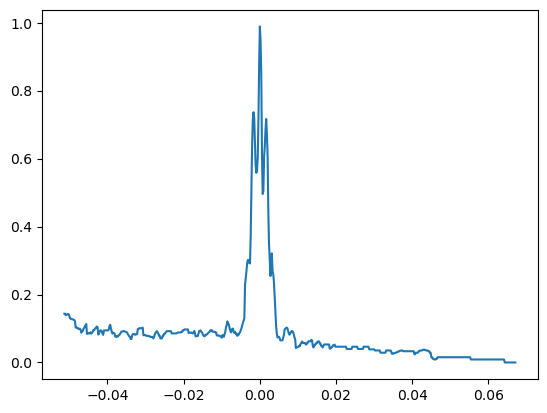

In [182]:
# Find the maximum value of the Brightness
max_value = np.max(Brightness)

# Find the index where the max Brightness is
max_location = np.where(Brightness == max_value)[0]

#Center the maximum
Distances = Distances - Distances[max_location]

#Set our minimum to zero
Brightness = Brightness - min(Brightness)

#Normalize our intensity
Brightness = Brightness/max_value


plt.plot(Distances, Brightness)

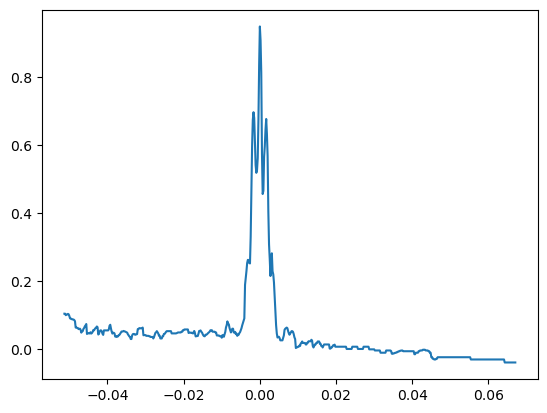

In [183]:
#You may have an offset due to background light or an asymetrical diffraction patern.
# subtract off this offset if needed. If not needed, just delete this line.
Brightness = Brightness - 


plt.plot(Distances, Brightness)

# Part 3: Fitting and extracting the wavelength

Load in your Intesity function from prelab 5. Since we are measuring slit width, slit seperation, and distance from slit to screen, we do not want our function to fit to these values, we will instead pass them to the function as constants. Our only fitted parameter is wavelenght.

In [184]:
# define your values, put all values in meters
d = 
b = 
D =

def Intensity(x, parameters):
    wavelength = parameters[0]
    
    # Define the Intensity
    I = 
    return I

def get_residuals_Intensity(parameters, data, x):
    residuals = np.abs(data - Intensity(x, parameters))
    return -residuals

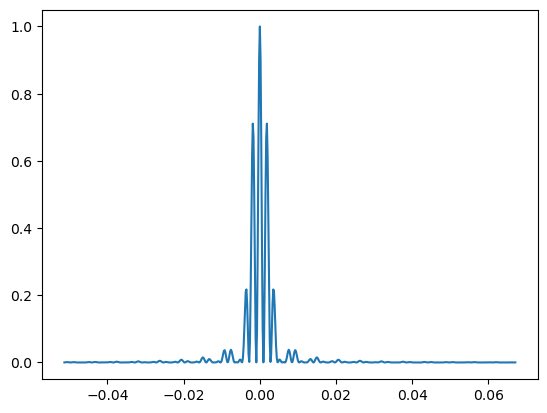

In [185]:
# Making sure our function works
Theoretical_Wavelength = 
Theoretical_Diffraction = Intensity(Distances, Theoretical_Wavelength)
plt.plot(Distances,Theoretical_Diffraction)
plt.xlabel('Distance [m]')
plt.ylabel('Intensity')
plt.legend()

The last thing we need to do is fit our function to our data to extract the wavelenght

The fitted wavelength is [651.64702068] nanometers
The percent error is [2.73925064] %


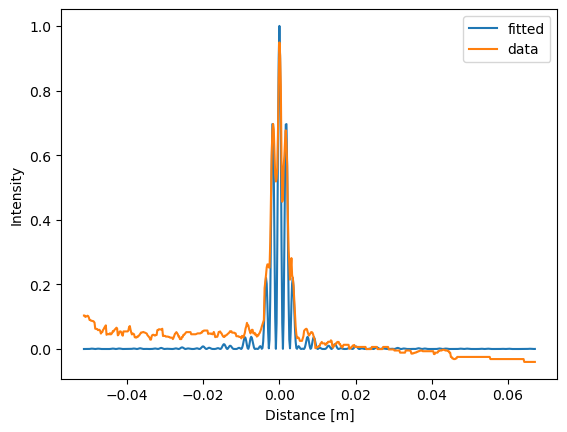

In [188]:
# Give the fit function a guess of the wavelength in meters
Guess_Wavelength = 

res_lsq = least_squares(#Function, #Guess_parameters, args = (#Ydata, #Xdata))
Fitted_Wavelength = res_lsq['x']


# Create a fit curve
Fitted_Line =

plt.plot(Distances,Fitted_Line, label = 'fitted')
plt.plot(Distances,Brightness, label = 'data')

plt.xlabel('Distance [m]')
plt.ylabel('Intensity')
plt.legend()

print('The fitted wavelength is', Fitted_Wavelength*10**9, 'nanometers')

#Find the perecent error
percent_error = 

print('The percent error is', percent_error, '%')